Project Final Exam. 

# LORITAH BUKIRWA - J24M19/003

### PART B.

Use the dataset to investigate a range of research objectives;
1. Understanding the traffic density on various days of the week in the urban environments. [ 20 MARKS ]

2. Analyzing the impact of various factors like weather, economic conditions, and vehicle Types on traffic density and energy consumption. [ 10 MARKS ]

3. Developing and testing traffic density prediction algorithms for smart city solutions. [ 10 MARKS ]

In [1]:
#suppress warnings

import warnings 
warnings.filterwarnings('ignore')

#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#import dataset
traffic = pd.read_csv('Traffic_Data.csv')

traffic.head(5)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [2]:
#checking for missing data
traffic.isna().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [3]:
#info on the dataset
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


### Question 1. 

Understanding the traffic density on various days of the week in the urban environments. [ 20 MARKS ]

In [4]:
traffic.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

In [5]:
#Grouping data to include Day of Week and Traffic Density
traffic_density = traffic.groupby('Day Of Week')['Traffic Density'].mean()


#Defning days of the week to allow for proper alignment of results.
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the Series to match the order of days of the week
traffic_density = traffic_density.reindex(days_of_week_order)

print(traffic_density)


Day Of Week
Monday       0.273950
Tuesday      0.272943
Wednesday    0.273143
Thursday     0.272366
Friday       0.280504
Saturday     0.283474
Sunday       0.283350
Name: Traffic Density, dtype: float64


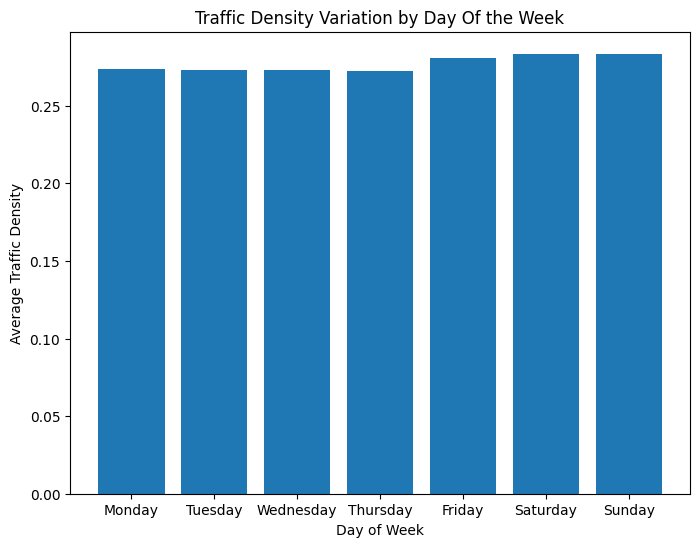

In [6]:
#create a bar plot
plt.figure(figsize=(8,6))
plt.bar(traffic_density.index, traffic_density.values)
plt.xlabel("Day of Week")
plt.ylabel("Average Traffic Density")
plt.title("Traffic Density Variation by Day Of the Week")
plt.show()

There are no significant variations in traffic density based on the day of the week. Since all bars are of almost equal height, it suggests that traffic density remains consistent throughout the week. This therefore indicates that commuters experience similar traffic conditions regardless of the day.


In [ ]:
sns.heatmap(traffic_density, cmap='Blues', annot=True, fmt='.2f', cbar_kws={'label': 'Traffic Density'})
plt.xlabel('Day of Week')
plt.ylabel('City')
plt.title('Traffic Density by City and Day of Week')
plt.show()

### Question 2. 

Analyzing the impact of various factors like weather, economic conditions, and vehicle Types on traffic density and energy consumption. [ 10 MARKS ]

### Analyzing the impact of weather

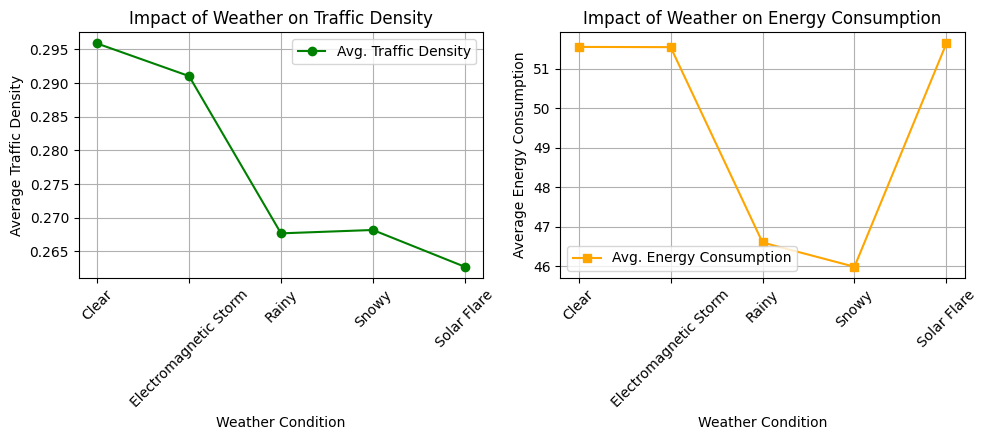

In [7]:
# Analyzing the impact of weather on traffic density and energy consumption
weather_groups = traffic.groupby("Weather")
avg_traffic_density_weather = weather_groups["Traffic Density"].mean()
avg_energy_consumption_weather = weather_groups["Energy Consumption"].mean()


# Plotting the results for weather
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))

# Plot for average traffic density
ax1.plot(avg_traffic_density_weather.index, avg_traffic_density_weather, marker='o', label='Avg. Traffic Density', color='green')
ax1.set_xlabel("Weather Condition")
ax1.set_ylabel("Average Traffic Density")
ax1.set_title("Impact of Weather on Traffic Density")
ax1.set_xticklabels(avg_traffic_density_weather.index, rotation=45)
ax1.legend()
ax1.grid(True)

# Plot for average energy consumption
ax2.plot(avg_energy_consumption_weather.index, avg_energy_consumption_weather, marker='s', label='Avg. Energy Consumption', color='orange')
ax2.set_xlabel("Weather Condition")
ax2.set_ylabel("Average Energy Consumption")
ax2.set_title("Impact of Weather on Energy Consumption")
ax2.set_xticklabels(avg_energy_consumption_weather.index, rotation=45)
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

The graph compares traffic density and energy consumption across weather conditions. Clear weather shows peaks in both, while rain/snow see dips. Solar flares and electromagnetic storms also affect these measures.

### Analyzing the impact of economic conditions.

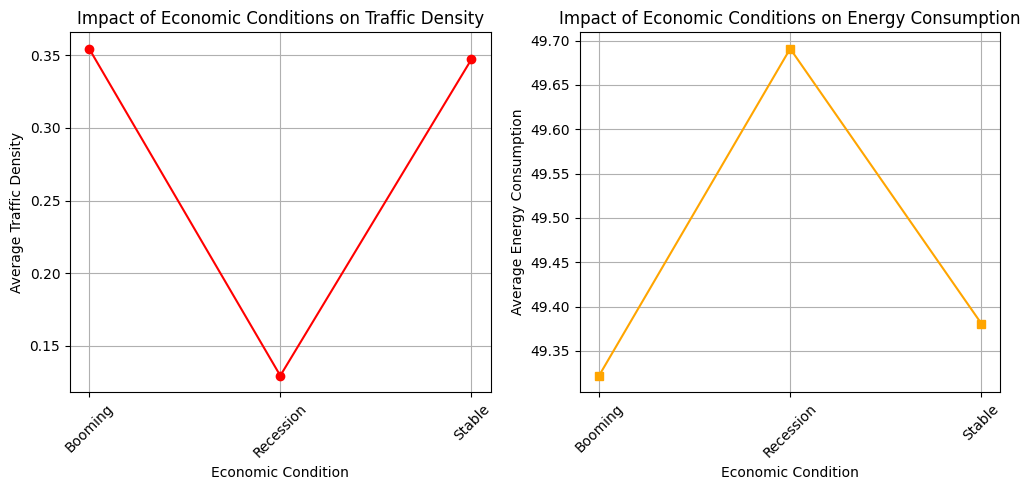

In [8]:
# Analyzing the impact of economic conditions on traffic density and energy consumption
economic_groups = traffic.groupby("Economic Condition")
avg_traffic_density_economic = economic_groups["Traffic Density"].mean()
avg_energy_consumption_economic = economic_groups["Energy Consumption"].mean()

# Plotting the results
plt.figure(figsize=(30, 5))


# Impact of Economic Conditions on Traffic Density
plt.subplot(1, 6, 3)
plt.plot(avg_traffic_density_economic.index, avg_traffic_density_economic, marker='o', color='red')
plt.xlabel("Economic Condition")
plt.ylabel("Average Traffic Density")
plt.title("Impact of Economic Conditions on Traffic Density")
plt.xticks(rotation=45)
plt.grid(True)

#Impact of Economic Conditions on Energy Consumption
plt.subplot(1, 6, 4)
plt.plot(avg_energy_consumption_economic.index, avg_energy_consumption_economic, marker='s', color='orange')
plt.xlabel("Economic Condition")
plt.ylabel("Average Energy Consumption")
plt.title("Impact of Economic Conditions on Energy Consumption")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Traffic density rises with economic stability and booms, but dips during recessions. Energy consumption peaks in recessions and is lower during stable and booming economies.

### Analyzing the impact of vehicle types

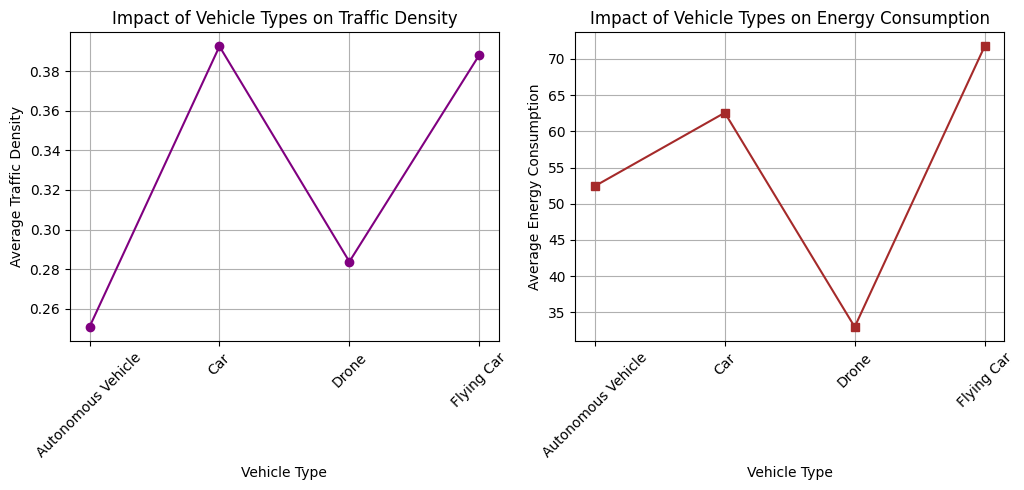

In [9]:
# Analyzing the impact of vehicle types on traffic density and energy consumption
vehicle_groups = traffic.groupby("Vehicle Type")
avg_traffic_density_vehicle = vehicle_groups["Traffic Density"].mean()
avg_energy_consumption_vehicle = vehicle_groups["Energy Consumption"].mean()

# Plotting the results
plt.figure(figsize=(30, 5))


# Impact of Vehicle Types on Traffic Density
plt.subplot(1, 6, 5)
plt.plot(avg_traffic_density_vehicle.index, avg_traffic_density_vehicle, marker='o', color='purple')
plt.xlabel("Vehicle Type")
plt.ylabel("Average Traffic Density")
plt.title("Impact of Vehicle Types on Traffic Density")
plt.xticks(rotation=45)
plt.grid(True)

# Impact of Vehicle Types on Energy Consumption
plt.subplot(1, 6, 6)
plt.plot(avg_energy_consumption_vehicle.index, avg_energy_consumption_vehicle, marker='s', color='brown')
plt.xlabel("Vehicle Type")
plt.ylabel("Average Energy Consumption")
plt.title("Impact of Vehicle Types on Energy Consumption")
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Conventional cars take the lead in causing traffic congestion and consuming the most energy, while autonomous vehicles excel in reducing traffic density and energy consumption. In contrast, flying cars may exacerbate traffic issues and harm the environment, contributing to congestion and high energy usage.

### Question 3

Developing and testing traffic density prediction algorithms for smart city solutions.

In [10]:
cat_traff = ["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]
cont_traff = ["Hour Of Day", "Speed", "Is Peak Hour","Random Event Occurred", "Energy Consumption", "Traffic Density"]           

Identifying target variable. 
- Traffic Density

Predictors. City to Energy Consumption
- Traffic Density = numerical, continous variable

<Axes: ylabel='Frequency'>

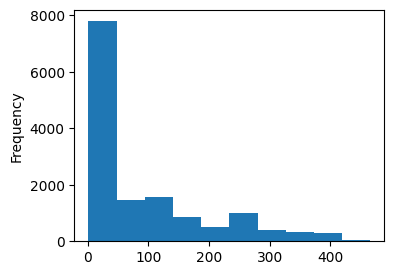

In [11]:
# Creating histogram as the Target variable is continous
GroupedData=traffic.groupby('Traffic Density').size()
GroupedData.plot(kind='hist', figsize=(4,3))

Plotting categorical variables 

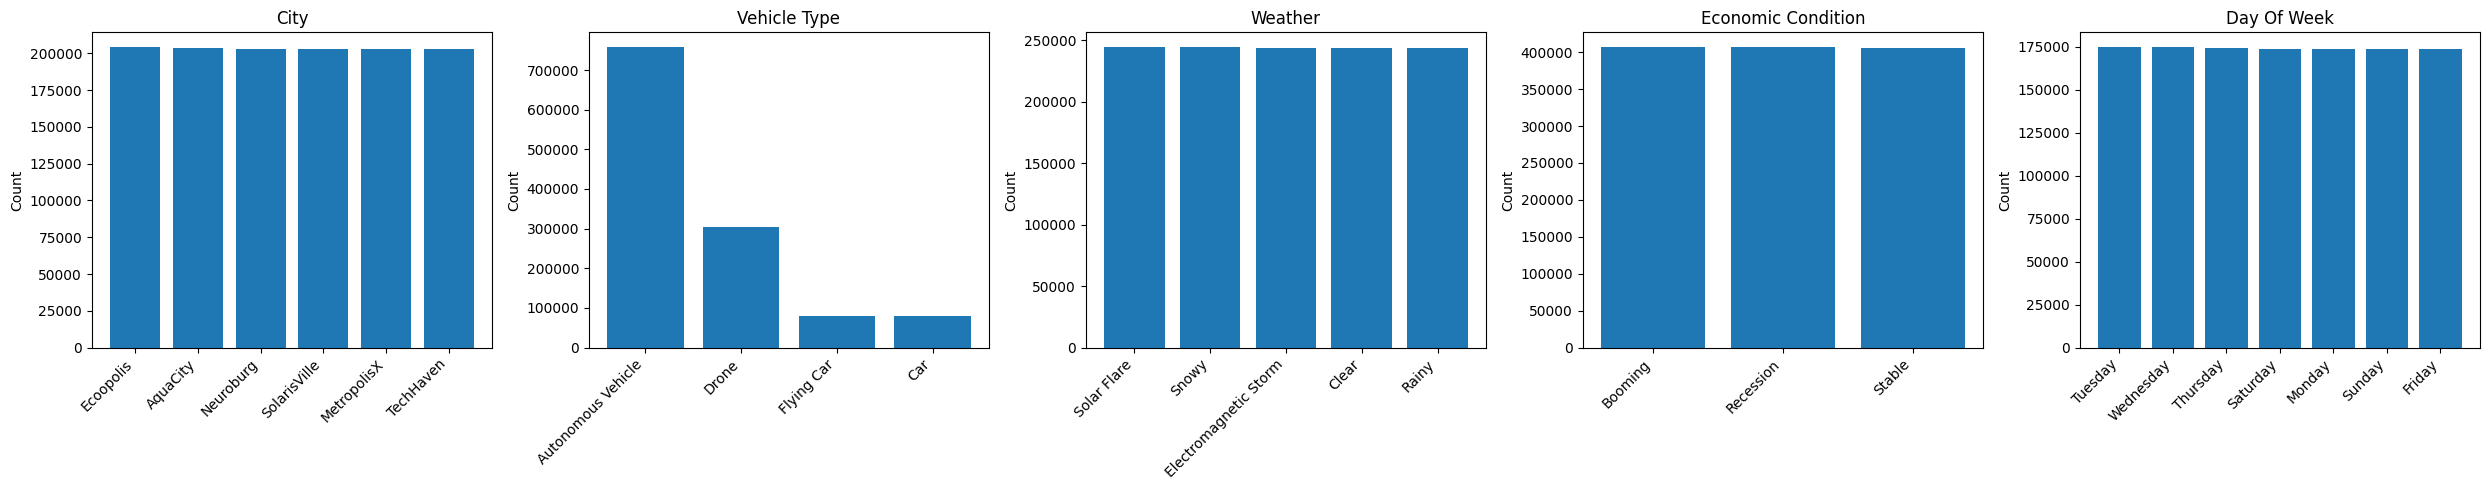

In [12]:
#showcasing the categorical variables.
def plot_cat_vars(traf, cat_vars):
    fig, axs = plt.subplots(1, len(cat_vars), figsize=(25, 5))
    for i, var in enumerate(cat_vars):
        axs[i].bar(traf[var].value_counts().index, traf[var].value_counts())
        axs[i].set_title(var)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('Count')
        axs[i].set_xticklabels(traf[var].value_counts().index, rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

#calling the function
plot_cat_vars(traffic, cat_traff)

Looking at the data above, apart from Vehicle type, which is negatively skewed, the rest of the categories appear relatively symmentrical. In this data, all the categorical columns except "Vehicle Type" have satisfactory distribution for machine learning

array([[<Axes: title={'center': 'Hour Of Day'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'Energy Consumption'}>]], dtype=object)

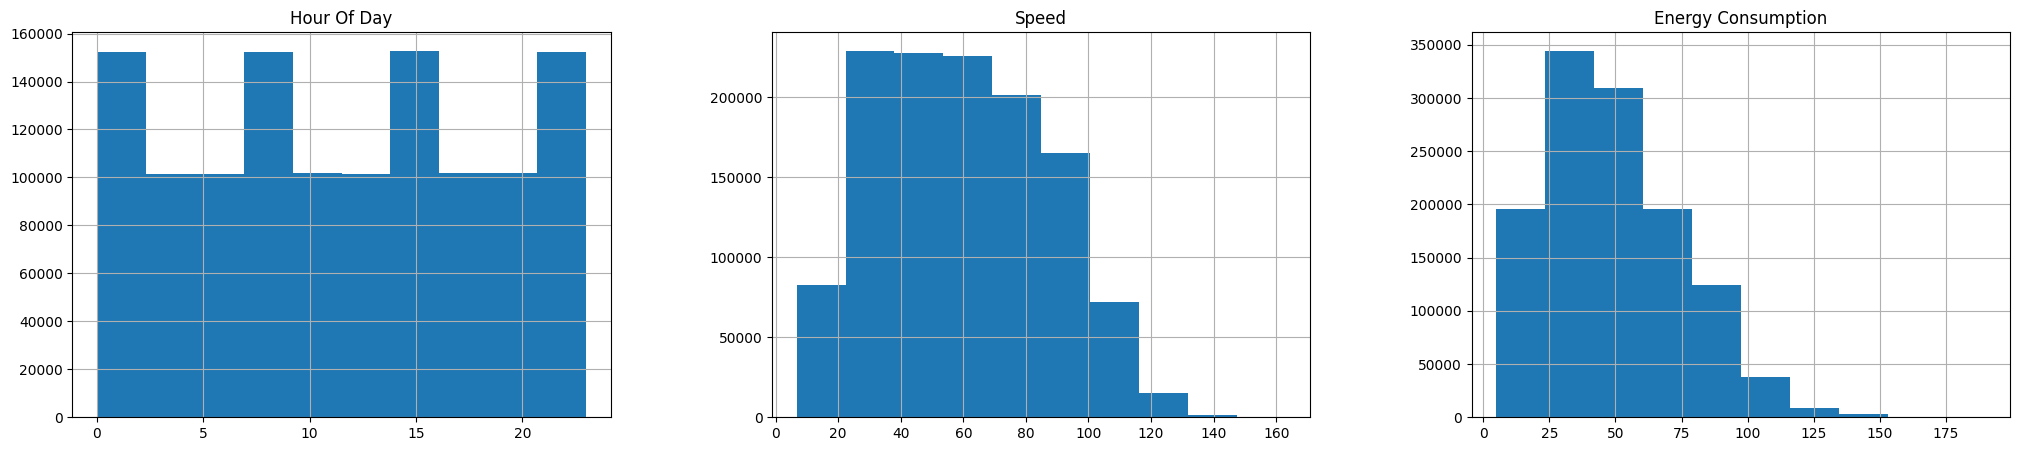

In [13]:
# Plotting histograms of multiple columns together
traffic.hist(["Hour Of Day", "Speed", "Energy Consumption"] , figsize=(25,5), layout=(1,3))

Selected Continuous Variables:

Hour of Day : Slightly skewed, acceptable.

Speed: Selected. Outliers seen beyond 120, need to treat them.

Energy Consumption: Selected. Outliers seen beyond 120, need to treat them.

In [14]:
#Outlier Treatmeant for Speed.
#Replacing outliers for 'Speed'
# Finding nearest values to below 20 mark
traffic['Speed'][traffic['Speed']<20].sort_values()


169483      6.6934
780779      6.7247
835523      6.7405
245518      7.0885
637720      7.0925
            ...   
682272     19.9995
714590     19.9995
1213275    19.9997
785731     19.9998
1071264    19.9999
Name: Speed, Length: 50900, dtype: float64

In [15]:
# Finding nearest values to below 20 mark
traffic['Speed'][traffic['Speed']>120].sort_values()


1097969    120.0006
411741     120.0009
863951     120.0019
605415     120.0026
354906     120.0047
             ...   
926650     163.0886
1206537    163.0886
1197895    163.0886
729908     163.0886
734177     163.0886
Name: Speed, Length: 7728, dtype: float64

array([[<Axes: title={'center': 'Speed'}>]], dtype=object)

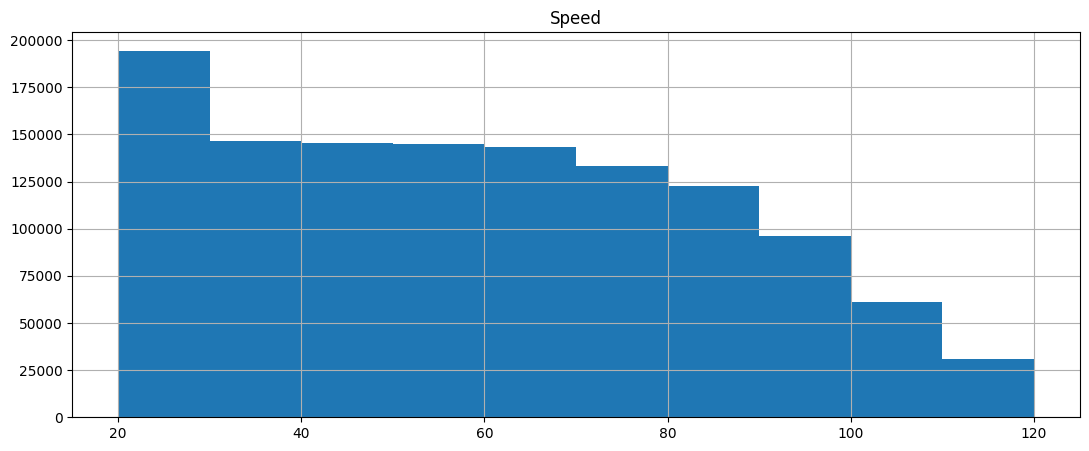

In [16]:
# Replacing outliers with nearest possibe value
traffic['Speed'][traffic['Speed']>120] = 120.0047
traffic['Speed'][traffic['Speed']<20] = 19.9999

#visualizing after outlier treatment
traffic.hist(['Speed'], figsize=(13,5))

In [17]:
#Outlier Treatmeant for Energy Consumption.
#Replacing outliers for 'Energy Consumption'
# Finding nearest values to above the 100 mark
traffic['Energy Consumption'][traffic['Energy Consumption']>100].sort_values()

26658      100.0003
723607     100.0004
935805     100.0005
258915     100.0007
1099113    100.0011
             ...   
866768     189.0828
439609     189.1284
162968     189.3982
89525      189.7600
594283     189.9489
Name: Energy Consumption, Length: 42552, dtype: float64

In [18]:
traffic['Energy Consumption'][traffic['Energy Consumption']<20].sort_values()

480283      4.9296
216906      5.2023
551156      5.2192
718719      5.3576
124024      5.4985
            ...   
37744      19.9996
311264     19.9997
1020667    19.9997
550217     19.9998
241114     19.9998
Name: Energy Consumption, Length: 132655, dtype: float64

array([[<Axes: title={'center': 'Energy Consumption'}>]], dtype=object)

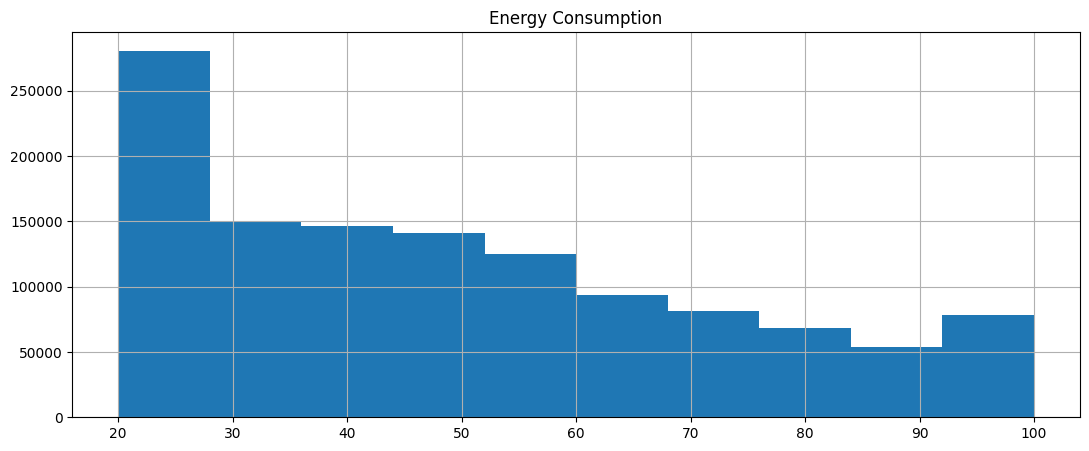

In [19]:
# Replacing outliers with nearest possibe value
traffic['Energy Consumption'][traffic['Energy Consumption']>100] = 100.0011
traffic['Energy Consumption'][traffic['Energy Consumption']<20] = 19.9998

#visualizing after outlier treatment
traffic.hist(['Energy Consumption'], figsize=(13,5))

Since the target variable is continuous, the following tests will be carried out for Feature selection::

- Visualization:
    - Scatter plots will be used to visualize the relationship between continuous variables and the target variable.
    - Box plots will be used to visualize the distribution of continuous variables and the target variable, as well as to compare the distribution of continuous variables across categorical variables.
- Statistical measurement:
    - Correlation matrix: A correlation matrix will be generated to quantify the strength of the relationships between continuous variables and the target variable.
    - ANOVA test: An analysis of variance (ANOVA) test will be conducted to determine whether there are significant differences in the means of continuous variables across categorical variables."

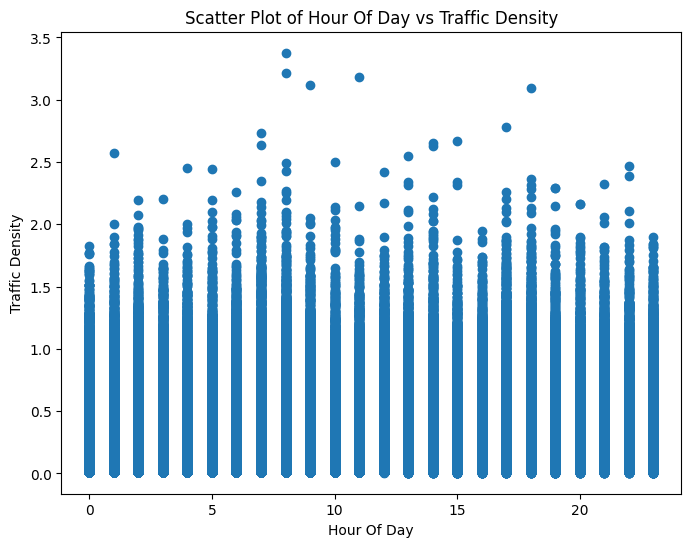

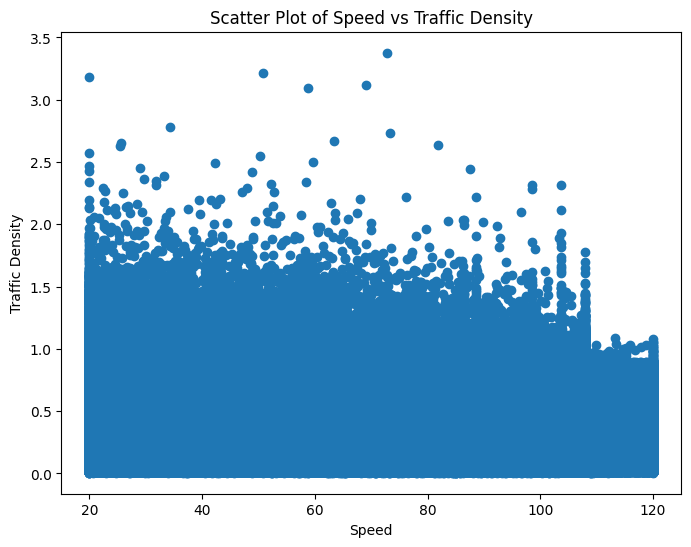

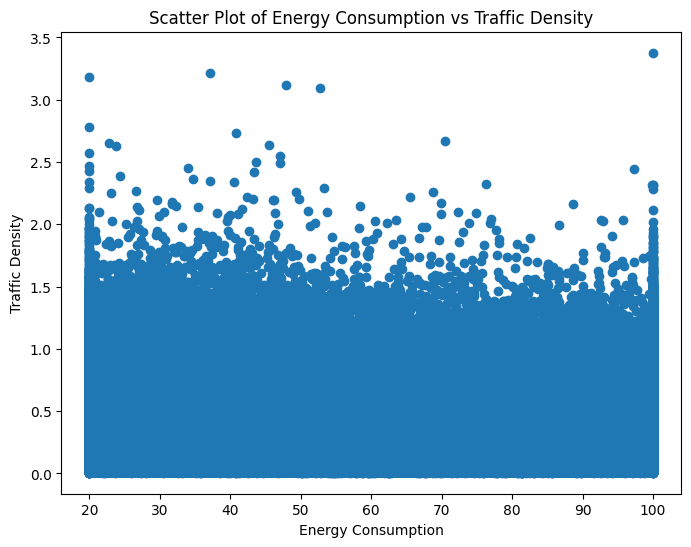

In [20]:
#Scatter Plot for continous variables.
Cont_Cols = ["Hour Of Day", "Speed", "Energy Consumption"]

for col in Cont_Cols:
    plt.figure(figsize=(8,6))
    plt.scatter(traffic[col], traffic['Traffic Density'])
    plt.xlabel(col)
    plt.ylabel('Traffic Density')
    plt.title(f'Scatter Plot of {col} vs Traffic Density')
    plt.show()

From observation, Speed - decreasing trend and Energy Consumption - increasing trend while Hour Of Day shows no trend thus eliminating it from the predictors to be used. Verifying with correlation matrix.

In [21]:
Cont_Cols_A = ["Traffic Density","Hour Of Day", "Speed", "Energy Consumption"]

# Creating the correlation matrix
Corr_Data=traffic[Cont_Cols_A].corr()
Corr_Data

,Traffic Density,Hour Of Day,Speed,Energy Consumption
Traffic Density,1.000000,-0.014640,-0.027624,0.005913
Hour Of Day,-0.014640,1.000000,0.002309,-0.002401
Speed,-0.027624,0.002309,1.000000,0.844438
Energy Consumption,0.005913,-0.002401,0.844438,1.000000


The correlation coefficients are very close to zero, indicating that the relationships between Traffic Density and the other variables are extremely weak. 

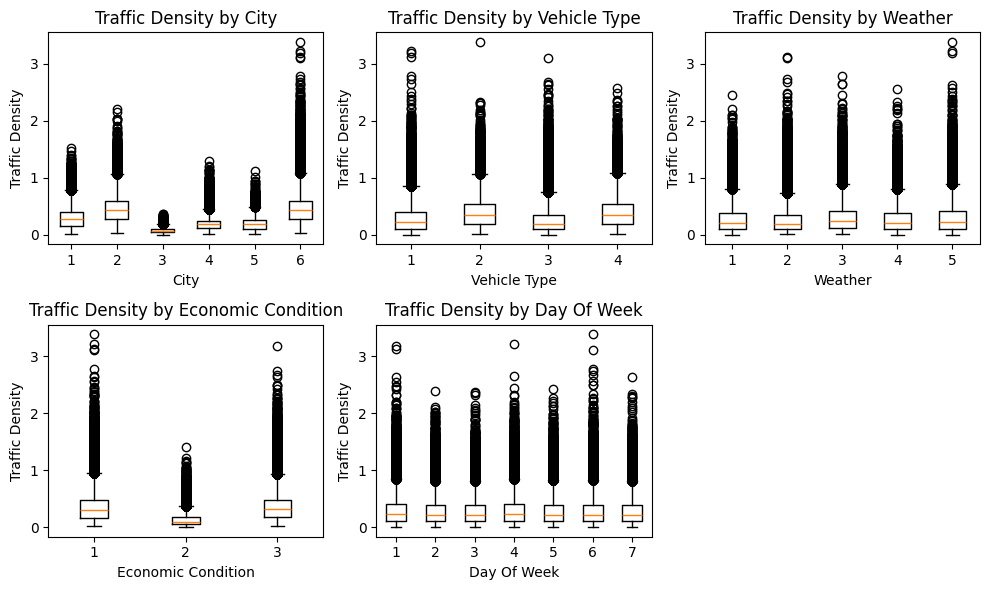

In [22]:
#Testing the categorical variables using box plots.
cat_traff_box = ["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]

plt.figure(figsize=(10, 6))

for i, category in enumerate(cat_traff_box, start=1):
    plt.subplot(2, 3, i)
    plt.boxplot([traffic[traffic[category] == value]["Traffic Density"] for value in traffic[category].unique()])
    plt.xlabel(category)
    plt.ylabel("Traffic Density")
    plt.title(f"Traffic Density by {category}")

plt.tight_layout()
plt.show()

In [23]:
def FunctionAnova(data, target, cat_traff_box):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in cat_traff_box:
        cat_traff_boxs=data.groupby(predictor)[target].apply(list)
        AnovaResults = f_oneway(*cat_traff_boxs)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', target, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', target, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

cat_traff_box=["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]
FunctionAnova(data=traffic, 
              target='Traffic Density', 
              cat_traff_box=cat_traff_box)

##### ANOVA Results ##### 

City is correlated with Traffic Density | P-Value: 0.0
Vehicle Type is correlated with Traffic Density | P-Value: 0.0
Weather is correlated with Traffic Density | P-Value: 0.0
Economic Condition is correlated with Traffic Density | P-Value: 0.0
Day Of Week is correlated with Traffic Density | P-Value: 1.685870698106298e-119


['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week']

All categorical variables are correlated to the density unlike the continous data. So using categorical data for the ML prediction


In [24]:
ML_Cols = ["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]

#checking for unique values in the categorical variables
for col in ML_Cols:
    uni_val = traffic[col].unique()
    print(f"Unique values for '{col}': {uni_val}")

Unique values for 'City': ['SolarisVille' 'AquaCity' 'Neuroburg' 'Ecoopolis' 'TechHaven'
 'MetropolisX']
Unique values for 'Vehicle Type': ['Drone' 'Flying Car' 'Autonomous Vehicle' 'Car']
Unique values for 'Weather': ['Snowy' 'Solar Flare' 'Clear' 'Rainy' 'Electromagnetic Storm']
Unique values for 'Economic Condition': ['Stable' 'Recession' 'Booming']
Unique values for 'Day Of Week': ['Sunday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday']


In [25]:
ML_Cols = ["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]

# Selecting final columns
DataForML=traffic[ML_Cols]
DataForML.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week
0,SolarisVille,Drone,Snowy,Stable,Sunday
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday
3,Ecoopolis,Drone,Clear,Booming,Thursday
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday


In [26]:
# Save this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [27]:
#transforming categorical data into numerical values. 
#nominal cols. 
nominal_cols = ["City", "Vehicle Type", "Weather", "Day Of Week"]
DataForML_nominal = DataForML[nominal_cols]

for i in nominal_cols:
    p  = DataForML[i].value_counts().to_dict()
    DataForML_nominal[i] = DataForML_nominal[i].map(p)
    
#ordinal cols. 
ordinal_cols = ["Economic Condition"]
DataForML_ordinal = DataForML[ordinal_cols].apply(lambda x: x.astype('category').cat.codes)

#Concatenate the encoded columns
DataForML_encoded = pd.concat([DataForML_nominal, DataForML_ordinal], axis=1)

#View the dataset
DataForML_encoded.head(5)


,City,Vehicle Type,Weather,Day Of Week,Economic Condition
0,202981,304951,244195,173823,2
1,203405,78864,244237,174778,1
2,203184,757454,244237,174778,1
3,204179,304951,243650,174509,0
4,203405,757454,244237,174097,2


In [28]:
# Add the target variable to the new dataset
# Adding Target Variable to the data
DataForML_encoded['Traffic Density']=traffic['Traffic Density']
DataForML_encoded

,City,Vehicle Type,Weather,Day Of Week,Economic Condition,Traffic Density
0,202981,304951,244195,173823,2,0.5241
1,203405,78864,244237,174778,1,0.3208
2,203184,757454,244237,174778,1,0.0415
3,204179,304951,243650,174509,0,0.1811
4,203405,757454,244237,174097,2,0.4544
...,...,...,...,...,...,...
1219562,202981,757454,243857,174778,0,0.3840
1219563,202981,304951,244195,174097,0,0.5526
1219564,203184,757454,244195,173905,0,0.0564
1219565,202981,757454,243650,173905,0,0.5079


Splitting the data into training and testing samples.

In [29]:
# Separate Target Variable and Predictor Variables
TargetVariable='Traffic Density'
Predictors=["City", "Vehicle Type","Weather", "Economic Condition", "Day Of Week"]

X=DataForML_encoded[Predictors].values
y=DataForML_encoded[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
#Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R**2 Score:", r2)

Mean Squared Error: 0.04570037371132482
R**2 Score: 0.048474508753588386


The data gives us an r2 score of 13.51% which is low. so we use the KNN means for another prediction.

In [31]:
#Features are standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the kNN model
k = 5  # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)

knn_model.fit(X_train, y_train)

# Making predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluating the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


print("Mean Squared Error with kNN:", mse_knn)
print("R2 Score with kNN:", r2_knn)

With a 59.70% score we can deploy the model. 